In [1]:
!pip3 install vnstock
from vnstock import *

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
VND = stock_historical_data(symbol = "VND", start_date="2017-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")


In [4]:
VND = VND[['Close']]
VND

,Close
Time,
2017-06-02,3280
2017-06-05,3280
2017-06-06,3320
2017-06-07,3590
2017-06-08,3540
...,...
2023-12-11,21950
2023-12-12,22050
2023-12-13,21600


In [5]:
VND['Target'] = VND.Close.shift(-1)
VND.dropna(inplace = True)
VND.head()

,Close,Target
Time,,
2017-06-02,3280,3280.0
2017-06-05,3280,3320.0
2017-06-06,3320,3590.0
2017-06-07,3590,3540.0
2017-06-08,3540,3560.0


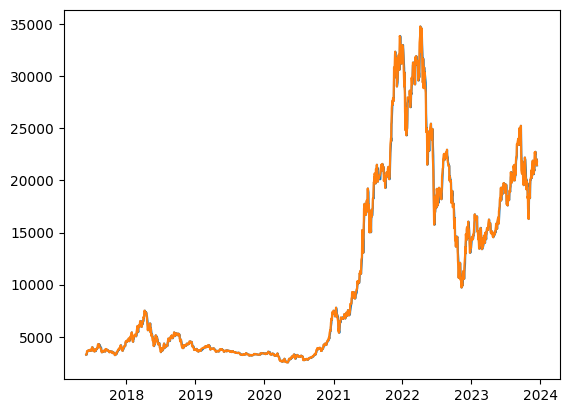

In [6]:
X = VND[['Close']]
y = VND[['Target']]

plt.plot(X)
plt.plot(y)
plt.show()

In [7]:
# chia train, test
train_size = int(0.8 * len(VND))
test_size = len(VND) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [8]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [9]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)


In [10]:
# tính toán độ chính xác của mô hình
mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
mae_poly = mean_absolute_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))
msle_poly = mean_squared_log_error(y_test, y_pred_poly)


In [11]:
# in kết quả độ chính xác của mô hình
print("RBF MAPE:", mape_rbf)
print("RBF MAE: ",  mae_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)
print("RBF MSLE: ", msle_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MAE:",  mae_poly)
print("Poly Testing RMSE:", test_rmse_poly)
print("Poly MSLE: ", msle_poly)



RBF MAPE: 2.5933184924468176
RBF MAE:  433.1374341890486
RBF Testing RMSE: Target    575.544565
dtype: float64
RBF MSLE:  0.0011673042226359568
Poly MAPE: 24.11353436902518
Poly MAE: 3938.118584792341
Poly Testing RMSE: Target    4027.570977
dtype: float64
Poly MSLE:  0.08840894633504438


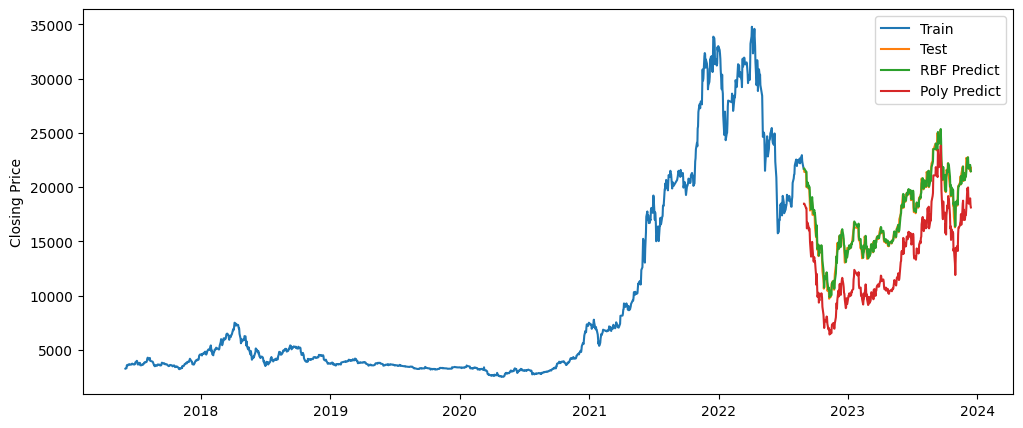

In [12]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [13]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = VND.tail(1)
last_data = last_row['Close'].values.reshape(-1,1)
last_data

array([[21450]])

In [14]:
# tạo mảng chứa giá trị predict của 60 ngày tiếp theo
x_next_60_days_rbf = []
x_next_60_days_poly = []
# predict giá Close 60 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(60):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_60_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_60_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_60_days_poly)

Kết quả dự đoán sử dụng RBF: [array([21466.75415575]), array([21483.08556766]), array([21499.00846726]), array([21514.5365179]), array([21529.68283904]), array([21544.46002964]), array([21558.88019053]), array([21572.95494595]), array([21586.6954641]), array([21600.11247692]), array([21613.21629897]), array([21626.01684546]), array([21638.52364956]), array([21650.74587891]), array([21662.69235139]), array([21674.37155021]), array([21685.79163828]), array([21696.96047197]), array([21707.88561424]), array([21718.57434714]), array([21729.03368379]), array([21739.27037976]), array([21749.290944]), array([21759.10164918]), array([21768.70854164]), array([21778.11745082]), array([21787.33399833]), array([21796.36360652]), array([21805.21150675]), array([21813.8827472]), array([21822.38220038]), array([21830.7145703]), array([21838.88439926]), array([21846.89607441]), array([21854.75383396]), array([21862.46177313]), array([21870.02384982]), array([21877.44389009]), array([21884.72559328]), a

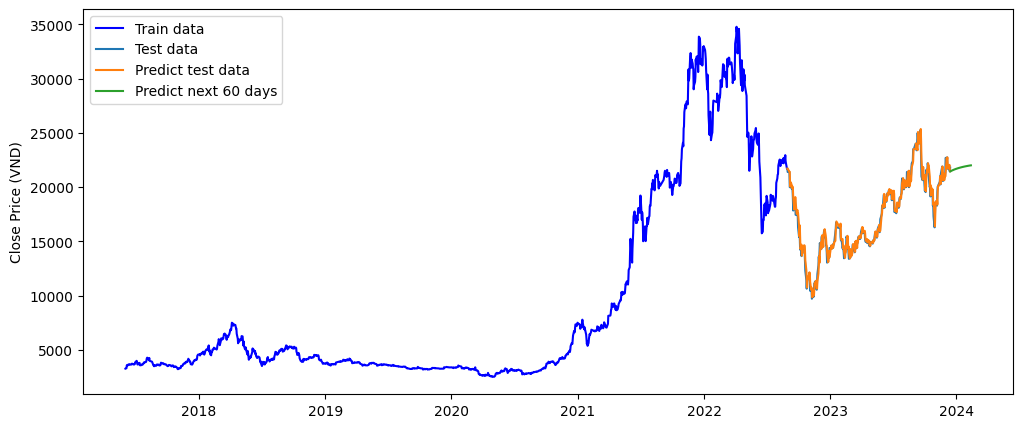

In [16]:
#vẽ mô hình
plt.figure(figsize=(12, 5))
plt.plot(y_train, label='Train data', color = 'b')
plt.plot(y_test, label='Test data')
plt.plot(X_test.index, y_pred_rbf, label='Predict test data')

last_date = X_test.index[-1]
next_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60, freq='D')
plt.plot(next_dates, x_next_60_days_rbf, label='Predict next 60 days')

plt.ylabel('Close Price (VND)')
plt.legend(loc = 'upper left')
plt.show()

